# CODENATION - ENEM 2016 GRADES

In this challenge, I will be analyzing data from the national exam called ENEM from 2016 in which students from all over the country take it as a means to get a spot in national universities. This exam is equivalent to the SATs in USA, but in Brazil.

The exam consists of four subjects (Natural Sciences, Human Sciences, Codes and Languages and Mathematics) and an essay. The exams are applied in two days:
- Day 01: Natural Sciences and Human Sciences subjects
- Day 02: Natural Languages, Mathematics and essay  

The aim of this analysis is to predict the Math grades for the students in the file [test.csv](./test.csv) by handling and modeling data from the  file [train.csv](./train.csv).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Exploration

The first thing I will do is having a look at my data through its [dictionary]('./enem_2016_dic.xlsx') to understand what each dimension/field means and then explore the pertinent fields to see if there are any missing values, type of data for each dimension/variable and outliers. I will start from the test file as it my trained model will be used over it, hence the features must be the same.

In [2]:
# reading the train and test files
enem_train = pd.read_csv('train.csv')
enem_test = pd.read_csv('test.csv')
enem_train = enem_train[list(enem_test.columns)+['NU_NOTA_MT']]

# The field NU_INSCRICAO is the candidate inscription number. I will drop it as they are all unique

enem_train.drop(columns = ['NU_INSCRICAO'], inplace = True)
enem_test.drop(columns = ['NU_INSCRICAO'], inplace = True)
enem_test.columns

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'],
      dtype='object')

In [3]:
# Checking for missing values in both datasets
df_aux = pd.DataFrame({
    # 'columns' : enem_train.columns,
    'type' : enem_train.dtypes,
    'missing' : enem_train.isna().sum(),
    'size' : enem_train.shape[0],
    'uniques' : enem_train.nunique()
})
df_aux["% missing"] = round(df_aux['missing']/df_aux['size'] * 100, 2)
df_aux.sort_values(by = ['missing'], ascending = False)
# This is for the training data set

,type,missing,size,uniques,% missing
TP_DEPENDENCIA_ADM_ESC,float64,9448,13730,4,68.81
TP_ENSINO,float64,9448,13730,3,68.81
Q027,object,7373,13730,13,53.70
NU_NOTA_MT,float64,3597,13730,3406,26.20
NU_NOTA_LC,float64,3597,13730,2774,26.20
TP_STATUS_REDACAO,float64,3597,13730,9,26.20
NU_NOTA_COMP1,float64,3597,13730,15,26.20
NU_NOTA_COMP2,float64,3597,13730,13,26.20
NU_NOTA_COMP3,float64,3597,13730,12,26.20
NU_NOTA_COMP4,float64,3597,13730,14,26.20


In [4]:
df_aux = pd.DataFrame({
    # 'columns' : enem_test.columns,
    'type' : enem_test.dtypes,
    'missing' : enem_test.isna().sum(),
    'size' : enem_test.shape[0],
    'uniques' : enem_test.nunique()
})
df_aux["% missing"] = round(df_aux['missing']/df_aux['size'] * 100, 2)
df_aux.sort_values(by = ['missing'], ascending = False)

# This is for the test dataset

,type,missing,size,uniques,% missing
TP_ENSINO,float64,3096,4576,3,67.66
TP_DEPENDENCIA_ADM_ESC,float64,3096,4576,4,67.66
Q027,object,2488,4576,13,54.37
NU_NOTA_COMP5,float64,1199,4576,11,26.20
NU_NOTA_COMP2,float64,1199,4576,10,26.20
NU_NOTA_LC,float64,1199,4576,1839,26.20
TP_STATUS_REDACAO,float64,1199,4576,9,26.20
NU_NOTA_REDACAO,float64,1199,4576,44,26.20
NU_NOTA_COMP1,float64,1199,4576,10,26.20
NU_NOTA_COMP4,float64,1199,4576,11,26.20


## Pre Selecting Fields

From the data dictionary, some fields can be readily discarded as they do not bring relevant information or are just duplicated information or have too much missing values. Besides, it would be better if we could consider less possible features. Fields to be dropped are:

- `NU_NOTA_COMP`: fields starting with *NU_NOTA_COMP* are grades that are part of the `NU_NOTA_REDACAO` already.
- `CO_PROVA`: fields starting with *CO_PROVA* which are exams reference codes
- `TP_PRESENCA` : fields starting with *TP_PRESENCA* are indicating if the candidate was present or not for the exam. This information is reflected in the grades already.
- `CO_UF_RESIDENCIA`: candidate federal unit (state) code
-`IN_` : fields starting with *IN_* 
- `Q027`, `TP_ENSINO`, `TP_DEPENDENCIA_ADM_ESC` : Too many missing values
- `TP_LINGUA`

**COMPLETE STILL!!!**

In [5]:
col_drop = ['CO_UF_RESIDENCIA', 'TP_STATUS_REDACAO','TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027', 'TP_LINGUA']

in_bool = enem_train.columns.str.startswith(('IN_', 'NU_NOTA_COMP','CO_PROVA_', 'TP_PRESENCA'))
enem_drop = enem_train.T[in_bool]
enem_drop = list(enem_drop.T.columns)
col_drop += enem_drop
col_drop # Columns to drop

['CO_UF_RESIDENCIA',
 'TP_STATUS_REDACAO',
 'TP_ENSINO',
 'TP_DEPENDENCIA_ADM_ESC',
 'Q027',
 'TP_LINGUA',
 'IN_TREINEIRO',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [6]:
if 'Q027' in enem_train:
    enem_train.drop(columns = col_drop, inplace = True)
    enem_test.drop(columns = col_drop, inplace = True)

# These are the columns left
enem_train.describe()

,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000
mean,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,473.495155,529.661087,516.472841,529.048258,482.497928
std,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,71.093674,73.726344,68.688190,154.294758,99.826323
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,419.900000,480.400000,468.100000,440.000000,408.900000
50%,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,459.800000,532.000000,520.900000,540.000000,461.200000
75%,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,514.500000,581.200000,564.900000,600.000000,537.600000
max,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,806.400000,807.000000,763.600000,1000.000000,952.000000


## Missing Values

In [7]:
pd.DataFrame({
    'enem_train' : enem_train.isna().sum(),
    'enem_test' : enem_test.isna().sum()
    })

,enem_train,enem_test
NU_IDADE,0,0.0
NU_NOTA_CH,3389,1134.0
NU_NOTA_CN,3389,1134.0
NU_NOTA_LC,3597,1199.0
NU_NOTA_MT,3597,NaN
NU_NOTA_REDACAO,3597,1199.0
Q001,0,0.0
Q002,0,0.0
Q006,0,0.0
Q024,0,0.0


The missing values are for features related to the candidates grades. It is acceptable to fill these *na* values with *0*, assuming the candidates have failed/missed the exam for some reason.

In [8]:
enem_train.fillna(0, inplace = True)
enem_test.fillna(0, inplace = True)
if (enem_train.isna().sum().all() or enem_test.isna().sum().all()):
    print('There are still missing values')

## Dealing with Categorical Values

For the categorical values, I will use the *One-Hot-Encoding* method, which binarizes (0 or 1/ False or True) the unique values for the respective feature. For this, I will use Pandas method `get_dummies()`.

In [9]:
enem_train = pd.get_dummies(enem_train, dtype = 'int64')
enem_test = pd.get_dummies(enem_test, dtype = 'int64')
enem_test.columns

Index(['NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'SG_UF_RESIDENCIA_AC',
       'SG_UF_RESIDENCIA_AL', 'SG_UF_RESIDENCIA_AM', 'SG_UF_RESIDENCIA_AP',
       'SG_UF_RESIDENCIA_BA', 'SG_UF_RESIDENCIA_CE', 'SG_UF_RESIDENCIA_DF',
       'SG_UF_RESIDENCIA_ES', 'SG_UF_RESIDENCIA_GO', 'SG_UF_RESIDENCIA_MA',
       'SG_UF_RESIDENCIA_MG', 'SG_UF_RESIDENCIA_MS', 'SG_UF_RESIDENCIA_MT',
       'SG_UF_RESIDENCIA_PA', 'SG_UF_RESIDENCIA_PB', 'SG_UF_RESIDENCIA_PE',
       'SG_UF_RESIDENCIA_PI', 'SG_UF_RESIDENCIA_PR', 'SG_UF_RESIDENCIA_RJ',
       'SG_UF_RESIDENCIA_RN', 'SG_UF_RESIDENCIA_RO', 'SG_UF_RESIDENCIA_RR',
       'SG_UF_RESIDENCIA_RS', 'SG_UF_RESIDENCIA_SC', 'SG_UF_RESIDENCIA_SE',
       'SG_UF_RESIDENCIA_SP', 'SG_UF_RESIDENCIA_TO', 'TP_SEXO_F', 'TP_SEXO_M',
       'Q001_A', 'Q001_B', 'Q001_C', 'Q001_D', 'Q001_E', 'Q001_F', 'Q001_G',
       'Q001_H', 'Q002_A', 'Q002_

Our data is ready for some correlation exploration now!

## Analysis

First, I will analyse the correlation among variables/features.

In [10]:
target_MT = enem_train.corr()[['NU_NOTA_MT']].sort_values(by='NU_NOTA_MT',ascending = False)

corr_values = target_MT#.applymap(lambda x: abs(x)).sort_values(by='NU_NOTA_MT',ascending = False)
corr_values.head(15)

,NU_NOTA_MT
NU_NOTA_MT,1.000000
NU_NOTA_LC,0.943954
NU_NOTA_CN,0.907039
NU_NOTA_CH,0.903608
NU_NOTA_REDACAO,0.875929
Q026_A,0.217054
Q047_D,0.203560
TP_ESCOLA,0.189084
Q002_F,0.136741
Q001_F,0.117907


To visualize, I will plot a heatmap with all these correlations, but not considering absolute values. It is important to remeber that higher values for neither positive or negative directions are relevant correlations.

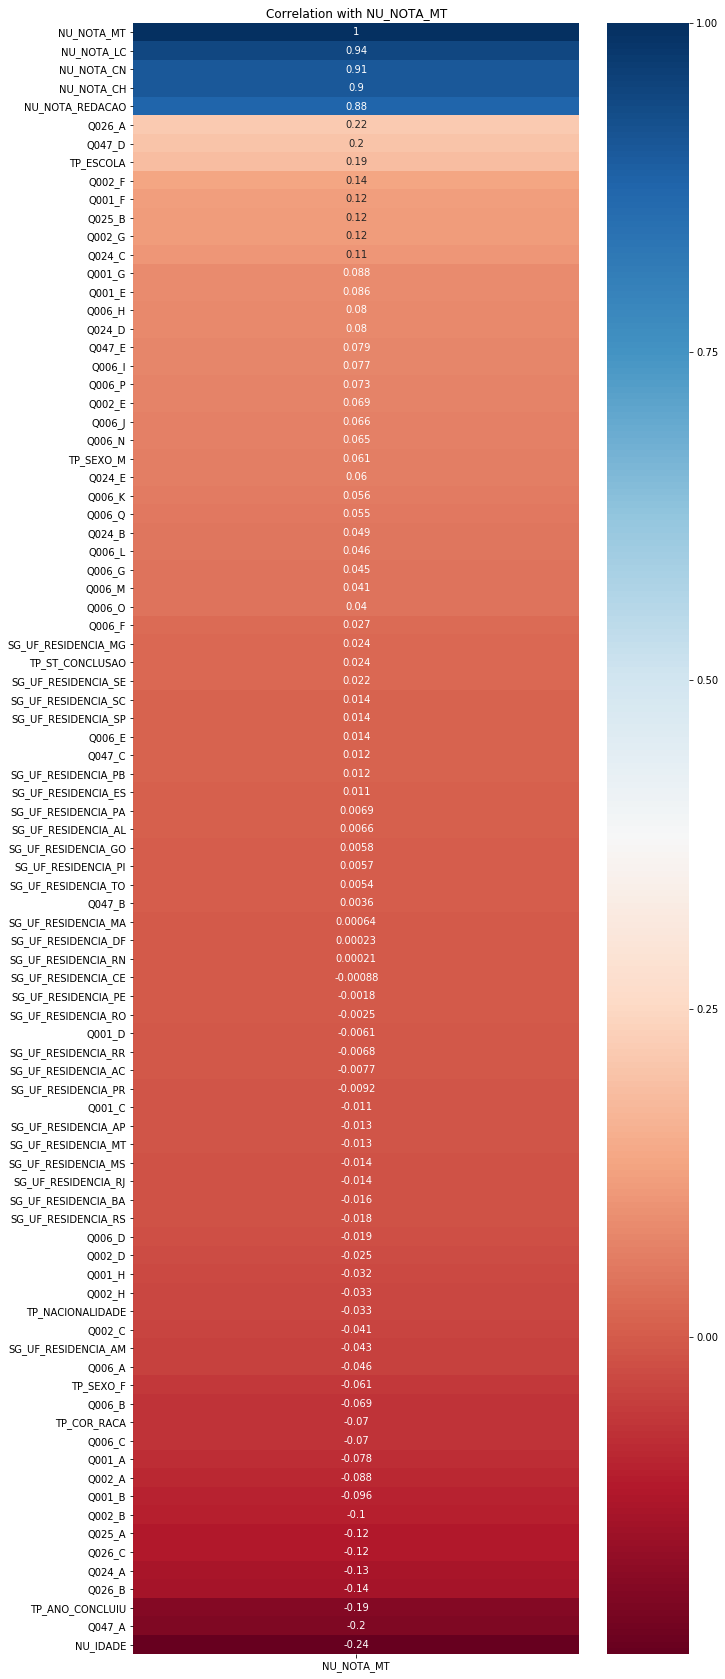

In [11]:
fig , ax = plt.subplots(figsize = (10,30))
ax = sns.heatmap(
    target_MT,
    annot = True,
    cmap = 'RdBu'

)
plt.title('Correlation with NU_NOTA_MT')
plt.show()

As we can observe, the main features correlated to the `NU_NOTA_MAT` are:

In [12]:
corr_cols = list(corr_values.head(7).index)
corr_cols.remove('NU_NOTA_MT')
corr_cols

['NU_NOTA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_REDACAO',
 'Q026_A',
 'Q047_D']

And those are the features we will use to build our model!

## Building and Applying Model

First, we need to split the features from the target. Fit and train the model in the train dataset and, finally, apply on the test dataset.

In [13]:
x_train = enem_train[corr_cols]
y_train = enem_train['NU_NOTA_MT']

In [14]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
lreg.score(x_train, y_train)

0.9043784047969097

In [23]:
x_test = enem_test[corr_cols]
answer = lreg.predict(x_test)
answer[answer < 0] = 0 #once there is no possibility of having negative grades
answer
# df = pd.DataFrame(answer)
# df.describe()

array([421.02432631, 480.4767255 , 557.82017606, ..., 621.22821887,
       483.90372142,   0.        ])

In [24]:
nu_insc = pd.read_csv('test.csv')['NU_INSCRICAO']
answer_tofile = pd.DataFrame(zip(nu_insc, answer), columns=['NU_INSCRICAO', 'NU_NOTA_MT'])
answer_tofile.to_csv(r'./answer.csv',index=False)